# Data import

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
from collections import Counter
from sklearn.metrics import mean_squared_error
from pandas import concat, Series, DataFrame

# machine learning
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

pd.set_option('display.max_columns', 100)

/home/sreya/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# import in the bird strikes data set
#bird = pd.read_csv("../Desktop/Bird Strikes Test.csv", low_memory=False, thousands=',')
bird = pd.read_csv("Bird Strikes Test.csv", low_memory=False, thousands=',')

# only drop rows that are all NA:
bird = bird.dropna(how='all')


In [8]:
import os
cwd = os.getcwd()
print (cwd)

/home/sreya/Desktop/birdstrike_analysis


In [9]:
# take a look at the first 5 rows of data

bird.head()

,Airport: Name,Altitude bin,Aircraft: Make/Model,Effect: Impact to flight,FlightDate,Record ID,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Wildlife: Size,Wildlife: Species,When: Time (HHMM),When: Time of day,Pilot warned of birds or wildlife?,Cost: Aircraft time out of service (hours),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots
0,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,A-319,NaN,1/1/2005 0:00,227413,No damage,2,NORTHWEST AIRLINES,Michigan,Climb,Medium,Unknown bird - medium,NaN,NaN,NaN,NaN,0,0,0,NaN,400.0,NaN
1,DANE COUNTY REGIONAL ARPT-TRUAX FLD,< 1000 ft,A-320,NaN,1/1/2005 0:00,226578,No damage,2,NORTHWEST AIRLINES,Wisconsin,Take-off run,Medium,Unknown bird - medium,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN
2,HOGUE ARPT,< 1000 ft,PA-46 MALIBU,NaN,1/1/2005 0:00,268383,Caused damage,1,PRIVATELY OWNED,Tennessee,Landing Roll,Large,White-tailed deer,NaN,Day,NaN,NaN,0,0,0,0.0,0.0,20.0
3,SACRAMENTO INTL,< 1000 ft,B-737-300,None,1/1/2005 0:00,229514,Caused damage,2,SOUTHWEST AIRLINES,California,Approach,Large,Greater white-fronted goose,2140.0,Night,Y,NaN,0,117135,117135,NaN,500.0,142.0
4,GUARULHOS INTL,< 1000 ft,B-767-300,NaN,1/1/2005 0:00,225661,No damage,2,UNITED AIRLINES,NaN,Landing Roll,Medium,Unknown bird - medium,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN


In [10]:
# check the number of entries and data type for each variable
#Concise summary of a DataFrame

bird.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65610 entries, 0 to 65609
Data columns (total 23 columns):
Airport: Name                                 65601 non-null object
Altitude bin                                  65610 non-null object
Aircraft: Make/Model                          65610 non-null object
Effect: Impact to flight                      36516 non-null object
FlightDate                                    65610 non-null object
Record ID                                     65610 non-null int64
Effect: Indicated Damage                      65610 non-null object
Aircraft: Number of engines?                  42766 non-null object
Aircraft: Airline/Operator                    65610 non-null object
Origin State                                  59163 non-null object
When: Phase of flight                         41051 non-null object
Wildlife: Size                                56684 non-null object
Wildlife: Species                             65593 non-null object
When: Ti

In [20]:
# get a quick description of non-null numeric values in the data

#drop : Return new object with labels in requested axis removed.
#describe : Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

bird.drop(['Record ID'], axis= 1).describe()


,When: Time (HHMM),Cost: Aircraft time out of service (hours),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots
count,36636.000000,4363.000000,6.561000e+04,6.561000e+04,6.561000e+04,37867.000000,35069.000000,25315.000000
mean,1389.074271,66.022003,3.638845e+02,4.170667e+03,4.534551e+03,0.756544,879.610283,151.563658
std,613.410508,328.540826,2.449922e+04,1.888698e+05,1.929826e+05,7.586022,1843.923421,267.393363
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,915.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,120.000000
50%,1410.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,50.000000,140.000000
75%,1930.000000,12.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,900.000000,160.000000
max,2359.000000,6480.000000,5.856751e+06,3.794880e+07,3.794880e+07,1300.000000,31300.000000,9999.000000


# Data is unbalanced

descriptive statistic will be performed with:

# whole data set 
# subset with any damage

In [22]:
# subset the data with damage / negative impact 
bird_dmg = bird.loc[(bird['Effect: Indicated Damage'] != 'No damage') | 
                    (bird['Cost: Total $'] > 0) ]

In [28]:
# get a table of number of strikes across aircraft type and aircraft engine numbers
count_air_type = DataFrame({'count' : bird.groupby( ['Aircraft: Number of engines?'] ).size()}).reset_index()
count_air_type.sort_values(['count'], ascending=0)


,Aircraft: Number of engines?,count
1,2,37127
2,3,2456
0,1,2114
3,4,1068
4,S,1


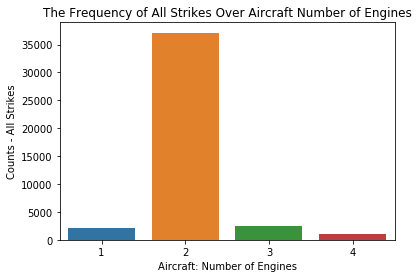

In [29]:
# set abnormal entries for Aircraft: Number of engines? to be NaN
bird.loc[(bird['Aircraft: Number of engines?'] == 'S'),'Aircraft: Number of engines?'] = np.nan

# update bird_dmg as well
bird_dmg = bird.loc[(bird['Effect: Indicated Damage'] != 'No damage') | 
                    (bird['Cost: Total $'] > 0) ]

# re-generate count table
count_air_type = DataFrame({'count' : bird.groupby( ['Aircraft: Number of engines?'] ).size()}).reset_index()
# plot the frequency of Aircraft: Number of engines?
fig_air_type = sns.barplot(x=u'Aircraft: Number of engines?', y='count', data=count_air_type)
fig_air_type.set(xlabel='Aircraft: Number of Engines', ylabel='Counts - All Strikes');
fig_air_type.set_title('The Frequency of All Strikes Over Aircraft Number of Engines');

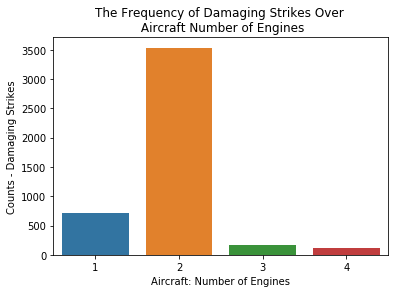

In [30]:
# table for damaging stikes
count_air_type0 = DataFrame({'count' : bird_dmg.groupby( [ 'Aircraft: Number of engines?'] ).size()}).reset_index()
count_air_type0['All Strikes Counts'] = count_air_type['count']
count_air_type0['Damage Rate'] = count_air_type0['count']/count_air_type0['All Strikes Counts']
# plot the frequency of Aircraft: Number of engines?
fig_air_type0 = sns.barplot(x=u'Aircraft: Number of engines?', y='count', data=count_air_type0)
fig_air_type0.set(xlabel='Aircraft: Number of Engines', ylabel='Counts - Damaging Strikes');
fig_air_type0.set_title('The Frequency of Damaging Strikes Over \n Aircraft Number of Engines');

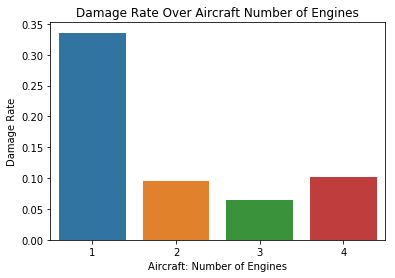

In [31]:
# plot the damage rate of Aircraft: Number of engines?
fig_air_type01 = sns.barplot(x=u'Aircraft: Number of engines?', y='Damage Rate', data=count_air_type0)
fig_air_type01.set(xlabel='Aircraft: Number of Engines', ylabel='Damage Rate');
fig_air_type01.set_title('Damage Rate Over Aircraft Number of Engines');

In [32]:
#top 10 frequent aircrafts

count_air_n_eng = DataFrame({'count' : bird.groupby( ['Aircraft: Airline/Operator'] ).size()}).reset_index()
count_air_n_eng.sort_values(['count'], ascending=0).head(10)

,Aircraft: Airline/Operator,count
277,UNKNOWN,16342
196,MILITARY,6108
253,SOUTHWEST AIRLINES,5995
72,BUSINESS,4305
134,FEDEX EXPRESS,3092
279,UPS AIRLINES,2898
275,UNITED AIRLINES,2805
45,AMERICAN AIRLINES,2102
111,DELTA AIR LINES,1573
250,SKYWEST AIRLINES,1569


In [33]:
count_air_n_eng0 = DataFrame({'count' : bird_dmg.groupby( ['Aircraft: Airline/Operator'] ).size()}).reset_index()
count_air_n_eng0.sort_values(['count'], ascending=0).head(10)

,Aircraft: Airline/Operator,count
42,BUSINESS,1220
153,SOUTHWEST AIRLINES,471
118,MILITARY,254
162,UNITED AIRLINES,248
138,PRIVATELY OWNED,241
165,UPS AIRLINES,197
25,AMERICAN AIRLINES,172
82,FEDEX EXPRESS,170
67,DELTA AIR LINES,169
101,JETBLUE AIRWAYS,113


In [34]:
#top 10 aircraft make or model sorted of frequency of getting struck
count_air_make = DataFrame({'count' : bird.groupby( ['Aircraft: Make/Model'] ).size()}).reset_index()
count_air_make.sort_values(['count'], ascending=0).head(10)



,Aircraft: Make/Model,count
448,UNKNOWN,19540
49,B-737-700,3634
195,CL-RJ100/200,3133
45,B-737-300,2912
6,A-320,2825
58,B-757-200,2363
5,A-319,1967
2,A-300,1748
258,EMB-145,1618
50,B-737-800,1132


In [37]:
count_air_make0 = DataFrame({'count' : bird_dmg.groupby( ['Aircraft: Make/Model'] ).size()}).reset_index()
count_air_make0.sort_values(['count'], ascending=0).head(10)


,Aircraft: Make/Model,count
41,B-737-700,278
38,B-737-300,268
49,B-757-200,236
6,A-320,225
145,CL-RJ100/200,208
5,A-319,171
307,UNKNOWN,161
98,C-172,149
181,EMB-145,122
2,A-300,115


In [38]:
# top 10 bird species - all strikes
count_species = DataFrame({'count' : bird.groupby( ['Wildlife: Species'] ).size()}).reset_index()
count_species.sort_values(['count'], ascending=0).head(10)

,Wildlife: Species,count
495,Unknown bird - small,12645
494,Unknown bird - medium,11513
319,Mourning dove,3265
496,Unknown bird or bat,3066
270,Killdeer,2188
11,American kestrel,1976
492,Unknown bird,1848
259,Horned lark,1670
31,Barn swallow,1639
186,European starling,1504


In [39]:
# top 10 bird species causing damages
count_species0 = DataFrame({'count' : bird_dmg.groupby( ['Wildlife: Species'] ).size()}).reset_index()
count_species0.sort_values(['count'], ascending=0).head(10)



,Wildlife: Species,count
221,Unknown bird - medium,1089
222,Unknown bird - small,518
220,Unknown bird - large,332
108,Gulls,209
44,Canada goose,192
239,White-tailed deer,171
219,Unknown bird,170
181,Red-tailed hawk,142
218,Turkey vulture,121
223,Unknown bird or bat,101


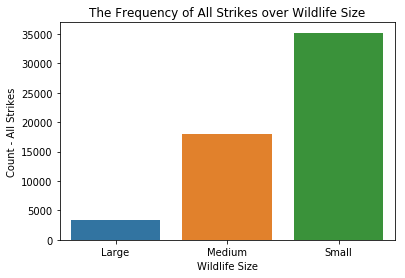

In [40]:
# count of strikes by bird size 
count_bird = DataFrame({'count' : bird.groupby( ['Wildlife: Size'] ).size()}).reset_index()
# plot the frequency of all strikes over Wildlife: Size
fig_bird = sns.barplot(x=u'Wildlife: Size', y='count', data=count_bird)
fig_bird.set(ylabel='Count - All Strikes',xlabel='Wildlife Size');
fig_bird.set_title('The Frequency of All Strikes over Wildlife Size');

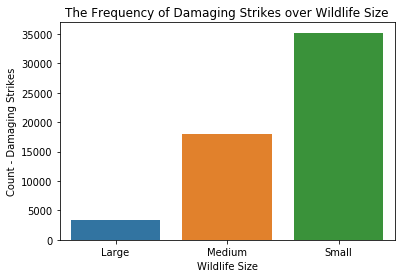

In [43]:
# count of strikes by bird size 
count_bird0 = DataFrame({'count' : bird_dmg.groupby( ['Wildlife: Size'] ).size()}).reset_index()
# plot the frequency of all strikes over Wildlife: Size
fig_bird0 = sns.barplot(x=u'Wildlife: Size', y='count', data=count_bird)
fig_bird0.set(ylabel='Count - Damaging Strikes',xlabel='Wildlife Size');
fig_bird0.set_title('The Frequency of Damaging Strikes over Wildlife Size');
#error
#had to divide by all strikes count

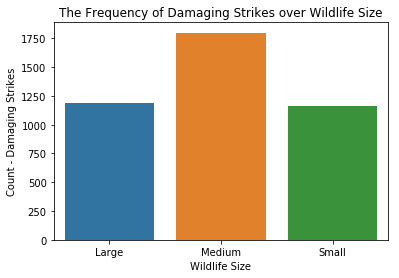

In [45]:
# count of strikes by bird size
count_bird0 = DataFrame({'count' : bird_dmg.groupby( ['Wildlife: Size'] ).size()}).reset_index()
count_bird0['All Strikes Counts'] = count_bird['count']
count_bird0['Damage Rate'] = count_bird0['count']/count_bird0['All Strikes Counts']

# plot the frequency of damaging strikes Wildlife: Number struck and Wildlife: Size
fig_bird0 = sns.barplot(x=u'Wildlife: Size', y='count', data=count_bird0)
fig_bird0.set(ylabel='Count - Damaging Strikes',xlabel='Wildlife Size');
fig_bird0.set_title('The Frequency of Damaging Strikes over Wildlife Size');

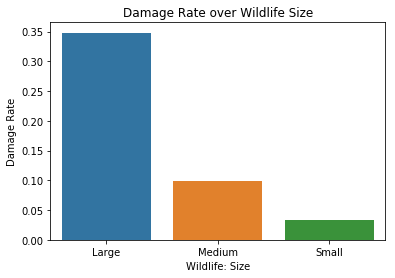

In [46]:
# plot damage rate over Wildlife: Size
fig_bird01 = sns.barplot(x=u'Wildlife: Size', y=u'Damage Rate', data=count_bird0)
fig_bird01.set(xlabel='Wildlife: Size', ylabel='Damage Rate');
fig_bird01.set_title('Damage Rate over Wildlife Size');


# Flight status during breaks

In [47]:
# There are a lot of missing data in these variables, but since the phase of the flight is available 
# some remedy is done here by filling in reasonalble values
bird.loc[ (bird['Miles from airport'].isnull()) & ( (bird['When: Phase of flight'] == 'Take-off run') |
          (bird['When: Phase of flight'] == 'Parked') | (bird['When: Phase of flight'] == 'Taxi') |
          (bird['When: Phase of flight'] == 'Landing Roll') ),'Miles from airport'] = 0
bird.loc[ (bird['Feet above ground'].isnull()) & ( (bird['When: Phase of flight'] == 'Take-off run') |
          (bird['When: Phase of flight'] == 'Parked') | (bird['When: Phase of flight'] == 'Taxi') |
          (bird['When: Phase of flight'] == 'Landing Roll') ),'Feet above ground'] = 0

In [48]:
DataFrame({'count' : bird.groupby( ['Altitude bin'] ).size()}).reset_index()



,Altitude bin,count
0,< 1000 ft,27523
1,> 1000 ft,7546
2,Unknown,30541


In [51]:
DataFrame({'count' : bird_dmg.groupby( ['Altitude bin'] ).size()}).reset_index()

,Altitude bin,count
0,< 1000 ft,2483
1,> 1000 ft,1225
2,Unknown,1188


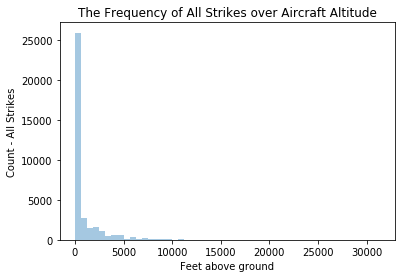

In [52]:
# histogram of all bird strikes with aircraft altitude 

hist_altitude = sns.distplot(bird['Feet above ground'].dropna(),kde=False);
hist_altitude.set_title('The Frequency of All Strikes over Aircraft Altitude');
hist_altitude.set(ylabel='Count - All Strikes');

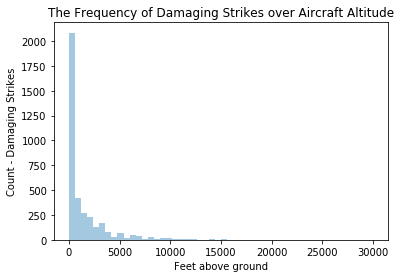

In [53]:
# histogram of damaging strikes with aircraft altitude 
hist_altitude0 = sns.distplot(bird_dmg['Feet above ground'].dropna(),kde=False);
hist_altitude0.set_title('The Frequency of Damaging Strikes over Aircraft Altitude');
hist_altitude0.set(ylabel='Count - Damaging Strikes');

In [54]:
# rate of aircraft below 1000 and 5000 ft for all strikes

rate_1000 = len( bird.loc[bird['Altitude bin']=='< 1000 ft','Altitude bin'] ) / len( bird.loc[(bird['Altitude bin']=='< 1000 ft') | (bird['Altitude bin']=='> 1000 ft'),'Altitude bin'] )
rate_5000 = len( bird.loc[bird['Feet above ground']<5000,'Feet above ground'] ) / len( bird.loc[~(bird['Feet above ground'].isnull()),'Feet above ground'] )

# rate of aircraft below 1000 and 5000 ft for damaging strikes

rate_1000 = len( bird_dmg.loc[bird_dmg['Altitude bin']=='< 1000 ft','Altitude bin'] ) / len( bird_dmg.loc[(bird_dmg['Altitude bin']=='< 1000 ft') | (bird_dmg['Altitude bin']=='> 1000 ft'),'Altitude bin'] )
rate_5000 = len( bird_dmg.loc[bird_dmg['Feet above ground']<5000,'Feet above ground'] ) / len( bird_dmg.loc[~(bird_dmg['Feet above ground'].isnull()),'Feet above ground'] )

In [58]:
count_phase = bird['When: Phase of flight'].value_counts()
count_phase

Approach        16914
Landing Roll     7304
Take-off run     7239
Climb            6317
En Route         1533
Descent          1261
Landing           315
Taxi              126
Parked             42
Name: When: Phase of flight, dtype: int64

# barplot

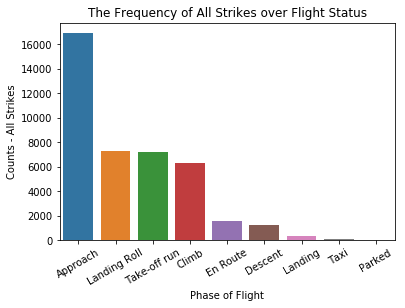

In [55]:
count_phase = bird['When: Phase of flight'].value_counts()
fig_count = sns.barplot(x=count_phase.index, y=count_phase)
fig_count.set_xticklabels(labels=count_phase.index,rotation=30);
fig_count.set(xlabel='Phase of Flight', ylabel='Counts - All Strikes');
fig_count.set_title('The Frequency of All Strikes over Flight Status');

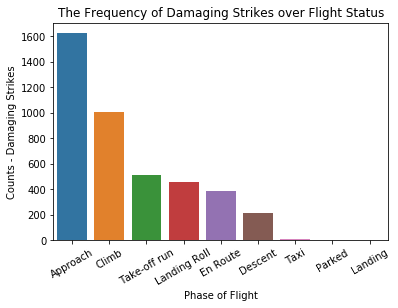

In [59]:
count_phase0 = bird_dmg['When: Phase of flight'].value_counts()
fig_count0 = sns.barplot(x=count_phase0.index, y=count_phase0)
fig_count0.set_xticklabels(labels=count_phase0.index,rotation=30);
fig_count0.set(xlabel='Phase of Flight', ylabel='Counts - Damaging Strikes');
fig_count0.set_title('The Frequency of Damaging Strikes over Flight Status');


# Boxplot

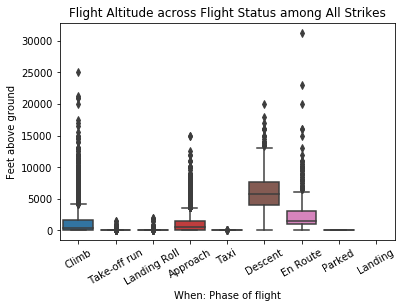

In [60]:
#altitude of the plane vs distance from the airport : boxplot

flight_altitude = sns.boxplot(x="When: Phase of flight", y="Feet above ground", data=bird)
flight_altitude.set_xticklabels(flight_altitude.get_xticklabels(), rotation=30);
flight_altitude.set_title('Flight Altitude across Flight Status among All Strikes');



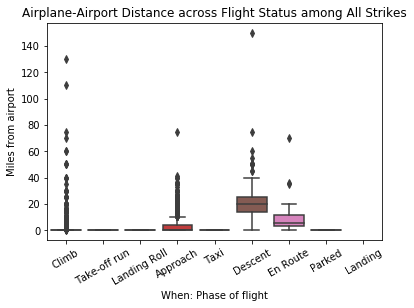

In [61]:
# one point stands out as the aircraft being 1200 miles from the airport in the Approach phase
# which is unlikely and could be a data entry error, the 'Miles from airport' in this row is thus
# replaced with NA, the boxplot is redrawn after the replacement
bird.loc[bird['Miles from airport'] > 1200,'Miles from airport'] = np.nan

# update bird_dmg as well
bird_dmg = bird.loc[(bird['Effect: Indicated Damage'] != 'No damage') | 
                    (bird['Cost: Total $'] > 0) ]

# re-draw the box plot
flight_miles1 = sns.boxplot(x="When: Phase of flight", y="Miles from airport", data=bird) 
flight_miles1.set_xticklabels(labels=flight_miles1.get_xticklabels(),rotation=30);
flight_miles1.set_title('Airplane-Airport Distance across Flight Status among All Strikes');

# Scatterplot

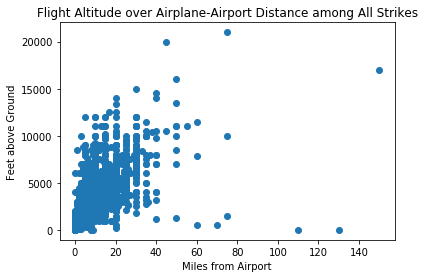

In [62]:
#scatteplot of dist vs altitude
bird1 = bird.loc[(~bird['Miles from airport'].isnull()) &
                        (~bird['Feet above ground'].isnull()) ]
plt.scatter(x='Miles from airport', y='Feet above ground', 
              data= bird1);
plt.xlabel('Miles from Airport');
plt.ylabel('Feet above Ground');
plt.title('Flight Altitude over Airplane-Airport Distance among All Strikes');

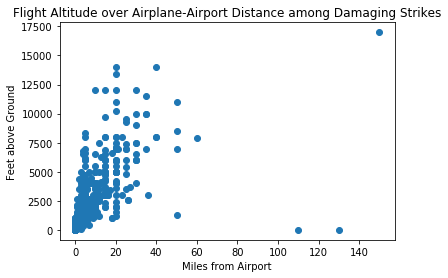

In [63]:
#.loc : Purely label-location based indexer for selection by label.

bird10 = bird_dmg.loc[(~bird_dmg['Miles from airport'].isnull()) &
                        (~bird_dmg['Feet above ground'].isnull()) ]
plt.scatter(x='Miles from airport', y='Feet above ground', 
              data= bird10);
plt.xlabel('Miles from Airport');
plt.ylabel('Feet above Ground');
plt.title('Flight Altitude over Airplane-Airport Distance among Damaging Strikes');

# Histogram plot

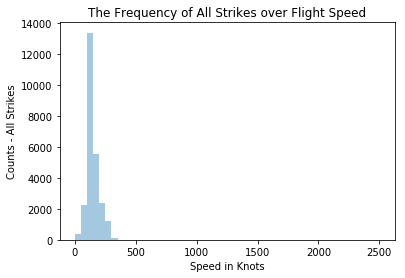

In [64]:
# histogram of speed
# the current record of airplane is 6082.834 knots, any entry higher than that is set as NA
bird.loc[bird['Speed (IAS) in knots'] > 6100,'Speed (IAS) in knots'] = np.nan
speed = sns.distplot(bird['Speed (IAS) in knots'].dropna(),kde=False);
speed.set(xlabel='Speed in Knots', ylabel='Counts - All Strikes');
speed.set_title('The Frequency of All Strikes over Flight Speed');


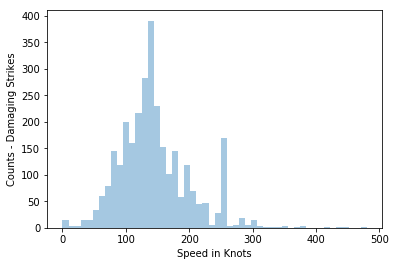

In [65]:
# histogram of speed
speed0 = sns.distplot(bird_dmg['Speed (IAS) in knots'].dropna(),kde=False);
speed0.set(xlabel='Speed in Knots', ylabel='Counts - Damaging Strikes');
speed.set_title('The Frequency of Damaging Strikes over Flight Speed ');

In [66]:
# top 10 airports among all strikes
df_location = pd.DataFrame({'count' : bird.groupby( ['Airport: Name'] ).size()}).reset_index()
df_location.sort_values(['count'], ascending=False).head(10)

,Airport: Name,count
1336,UNKNOWN,5989
312,DENVER INTL AIRPORT,2351
285,DALLAS/FORT WORTH INTL ARPT,1819
825,MEMPHIS INTL,1234
630,JOHN F KENNEDY INTL,1228
220,CHICAGO O'HARE INTL ARPT,1124
1132,SACRAMENTO INTL,1041
758,LOUISVILLE INTL ARPT,964
1138,SALT LAKE CITY INTL,849
647,KANSAS CITY INTL,846


In [67]:
# top 10 airports among all damaging strikes
df_airport0 = pd.DataFrame({'count' : bird_dmg.groupby( ['Airport: Name'] ).size()}).reset_index()
df_airport0.sort_values(['count'], ascending=False).head(10)

,Airport: Name,count
842,UNKNOWN,871
712,SACRAMENTO INTL,120
610,ORLANDO INTL,88
716,SALT LAKE CITY INTL,83
383,JOHN F KENNEDY INTL,80
512,MEMPHIS INTL,79
202,DENVER INTL AIRPORT,79
139,CHICAGO O'HARE INTL ARPT,72
184,DALLAS/FORT WORTH INTL ARPT,51
721,SAN FRANCISCO INTL ARPT,47


In [68]:
#Time of strike


# month variable
bird['Flight Month'] = pd.DatetimeIndex(bird['FlightDate']).month
# year variable
bird['Flight Year'] = pd.DatetimeIndex(bird['FlightDate']).year

# subset the data with any damage or negative impact to the flight
bird_dmg = bird.loc[(bird['Effect: Indicated Damage'] != 'No damage') | 
                    (bird['Cost: Total $'] > 0) ]

# heatmap of strike frequency vs year/month

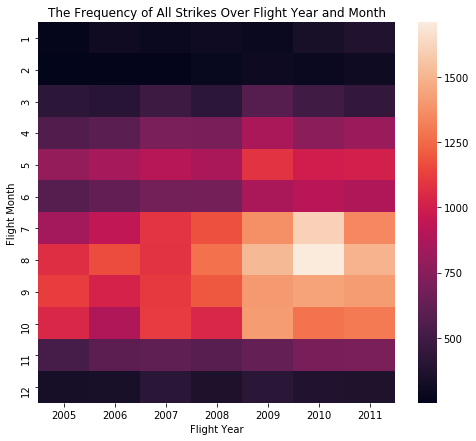

In [69]:
# count over flight month and year
count_time = DataFrame({'count' : bird.groupby( ['Flight Month', 'Flight Year'] ).size()}).reset_index()
# reshape frame
count_time_p=count_time.pivot("Flight Month", "Flight Year", "count")
# plot the frequency over month and year in a heat map
plt.figure(figsize=(8, 7))
heat_time = sns.heatmap(count_time_p);
heat_time.set_title('The Frequency of All Strikes Over Flight Year and Month');

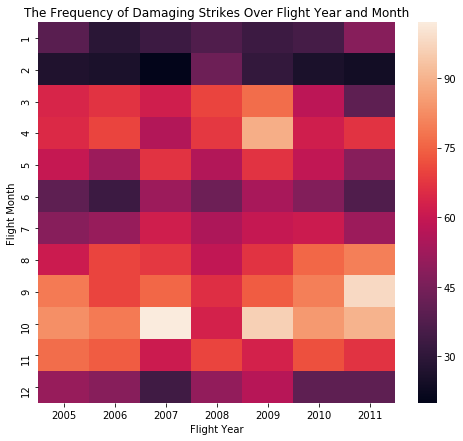

In [70]:
#for damaging strikes

# count over flight month and year
count_time0 = DataFrame({'count' : bird_dmg.groupby( ['Flight Month', 'Flight Year'] ).size()}).reset_index()
# reshape frame
count_time_p0=count_time0.pivot("Flight Month", "Flight Year", "count")
# plot the frequency over month and year in a heat map
plt.figure(figsize=(8, 7))
heat_time0 = sns.heatmap(count_time_p0);
heat_time0.set_title('The Frequency of Damaging Strikes Over Flight Year and Month');


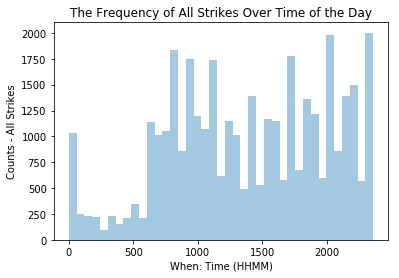

In [71]:
#frequency of strikes over time of the day

# histogram of time information

fig_time = sns.distplot(bird['When: Time (HHMM)'].dropna(),kde=False);
fig_time.set(ylabel='Counts - All Strikes');
fig_time.set_title('The Frequency of All Strikes Over Time of the Day');

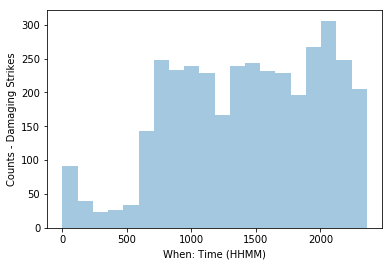

In [72]:
#damaging strikes over time of the day(HHMM format)

# histogram of time information
fig_time0 = sns.distplot(bird_dmg['When: Time (HHMM)'].dropna(),kde=False);
fig_time0.set(ylabel='Counts - Damaging Strikes');
fig_time.set_title('The Frequency of Damaging Strikes Over Time of the Day');

# Consequences

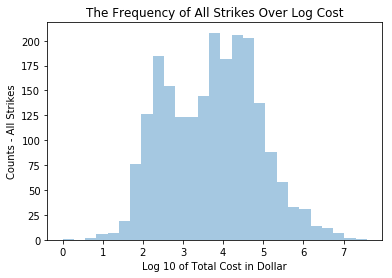

In [73]:
# cost histogram
cost = sns.distplot(np.log10(bird.loc[bird['Cost: Total $']>0,'Cost: Total $']),kde=False);
cost.set(xlabel='Log 10 of Total Cost in Dollar', ylabel='Counts - All Strikes');
cost.set_title('The Frequency of All Strikes Over Log Cost');

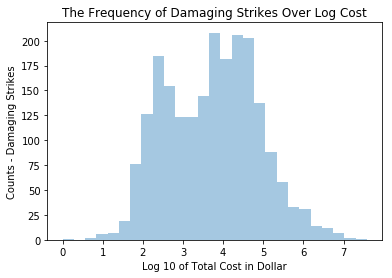

In [74]:
#damaging strikes
#cost histogram
cost0 = sns.distplot(np.log10(bird_dmg.loc[bird_dmg['Cost: Total $']>0,'Cost: Total $']),kde=False);
cost0.set(xlabel='Log 10 of Total Cost in Dollar', ylabel='Counts - Damaging Strikes');
cost0.set_title('The Frequency of Damaging Strikes Over Log Cost');

In [75]:
# damage count table(damage vs no damage)
DataFrame({'count' : bird.groupby( ['Effect: Indicated Damage'] ).size()}).reset_index()

,Effect: Indicated Damage,count
0,Caused damage,4075
1,No damage,61535


# Inferential statistics

damaged/not damaged strikes are classified using five models:
lr,knn,gnb,svm,rf

# Resample data

In [76]:
# add damage index
bird['Damage'] = 0
bird.loc[(bird['Effect: Indicated Damage'] != 'No damage') | 
                    (bird['Cost: Total $'] > 0) ,'Damage'] = 1

# define independent and dependent variables
X = ['Aircraft: Number of engines?',
     'Wildlife: Size',
     'When: Phase of flight','Feet above ground','Miles from airport','Speed (IAS) in knots',
     'Flight Month','Flight Year','When: Time (HHMM)',
     'Pilot warned of birds or wildlife?']
Y = ['Damage']

# clean missing data, keep those with values on key metrics
bird_keep = bird[np.concatenate((X,Y))].dropna(how='any')


In [77]:
# list of damage indices
damage_index = np.array(bird_keep[bird_keep["Damage"]==1].index)

# getting the list of normal indices from the full dataset
normal_index = bird_keep[bird_keep["Damage"]==0].index

No_of_damage = len(bird_keep[bird_keep["Damage"]==1])

# choosing random normal indices equal to the number of damaging strikes
normal_indices = np.array( np.random.choice(normal_index, No_of_damage, replace= False) )

# concatenate damaging index and normal index to create a list of indices
undersampled_indices = np.concatenate([damage_index, normal_indices])

# define training and testing sets
# choosing random indices equal to the number of damaging strikes
train_indices = np.array( np.random.choice(undersampled_indices, No_of_damage, replace= False) )
test_indices = np.array([item for item in undersampled_indices if item not in train_indices])

In [78]:
# add dummy variables for categorical variables
wildlife_dummies = pd.get_dummies(bird_keep['Wildlife: Size'])
bird_keep = bird_keep.join(wildlife_dummies)

phase_dummies = pd.get_dummies(bird_keep['When: Phase of flight'])
bird_keep = bird_keep.join(phase_dummies)

warn_dummies = pd.get_dummies(bird_keep['Pilot warned of birds or wildlife?'])
bird_keep = bird_keep.join(warn_dummies)

#  convert engine number to numeric
bird_keep['Aircraft: Number of engines?'] = pd.to_numeric(bird_keep['Aircraft: Number of engines?'])

# scale variables before fitting our model to our dataset
# flight year scaled by subtracting the minimum year
bird_keep["Flight Year"] = bird_keep["Flight Year"] - min(bird_keep["Flight Year"])
# scale time by dividing 100 and center to the noon
bird_keep["When: Time (HHMM)"] = bird_keep["When: Time (HHMM)"]/100-12
# scale speed
bird_keep["Speed (IAS) in knots"] = scale( bird_keep["Speed (IAS) in knots"], axis=0, with_mean=True, with_std=True, copy=False )


In [79]:
# use the undersampled indices to build the undersampled_data dataframe
undersampled_bird = bird_keep.loc[undersampled_indices, :]

# drop original values after dummy variables added
bird_use = undersampled_bird.drop(['Wildlife: Size','When: Phase of flight',
     'Pilot warned of birds or wildlife?'],axis=1)

# Separating to train and test sets

In [80]:
# define training and testing sets
# choosing random indices equal to the number of damaging strikes
X_train = bird_use.drop("Damage",axis=1).loc[train_indices,]
Y_train = bird_use.loc[train_indices,'Damage']
X_test = bird_use.drop("Damage",axis=1).loc[test_indices,]
Y_test = bird_use.loc[test_indices,'Damage']
X_test.head()

,Aircraft: Number of engines?,Feet above ground,Miles from airport,Speed (IAS) in knots,Flight Month,Flight Year,When: Time (HHMM),Large,Medium,Small,Approach,Climb,Descent,En Route,Landing Roll,Parked,Take-off run,Taxi,N,Y
258,2,0.0,0.0,-2.626145,1,0,6.30,1,0,0,0,0,0,0,1,0,0,0,1,0
643,1,0.0,0.0,-1.696239,3,0,-1.80,1,0,0,0,0,0,0,0,0,1,0,0,1
908,2,0.0,0.0,-1.231285,3,0,11.00,1,0,0,0,0,0,0,1,0,0,0,1,0
1241,2,0.0,0.0,-1.231285,4,0,8.37,1,0,0,0,0,0,0,1,0,0,0,1,0
1764,2,0.0,0.0,0.163575,5,0,8.12,0,1,0,0,0,0,0,0,0,1,0,1,0


# logistic regression

In [81]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
print('Training Accuracy:')
logreg.score(X_train, Y_train)

Training Accuracy:


0.69704142011834325

In [82]:
# generate evaluation metrics
logreg_t = metrics.accuracy_score(Y_test, Y_pred)
print('Testing Accuracy:')
logreg_t

Testing Accuracy:


0.69704142011834325

In [83]:
# evaluate the model using 10-fold cross-validation
scores_lr = cross_val_score(logreg, X_train, Y_train, scoring='accuracy', cv=10)
print('Cross-Validation Accuracy:')
print (scores_lr.mean())


Cross-Validation Accuracy:
0.687498860009


# Support Vector Machine

In [84]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
print('Training Accuracy:')
svc.score(X_train, Y_train)


Training Accuracy:


0.85088757396449699

In [85]:
# generate evaluation metrics
svc_t = metrics.accuracy_score(Y_test, Y_pred)
print('Testing Accuracy:')
svc_t

Testing Accuracy:


0.59644970414201182

In [86]:
# evaluate the model using 10-fold cross-validation
scores_svc = cross_val_score(svc, X_train, Y_train, scoring='accuracy', cv=10)
print('Cross-Validation Accuracy:')
print (scores_svc.mean())

Cross-Validation Accuracy:
0.601179727705


# Random forest

In [87]:
# Random Forests
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
print('Training Accuracy:')
rf.score(X_train, Y_train)

Training Accuracy:


1.0

In [88]:
# generate evaluation metrics
rf_t = metrics.accuracy_score(Y_test, Y_pred)
print('Testing Accuracy:')
rf_t

Testing Accuracy:


0.67810650887573964

In [89]:
# evaluate the model using 10-fold cross-validation
scores_rf = cross_val_score(rf, X_train, Y_train, scoring='accuracy', cv=10)
print('Cross-Validation Accuracy:')
print (scores_rf.mean())

Cross-Validation Accuracy:
0.664962868868


# K Nearest Neighbour Classifier

In [102]:
# KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print('Training Accuracy:')
knn.score(X_train, Y_train)


Training Accuracy:


0.77869822485207096

In [103]:
# generate evaluation metrics
knn_t = metrics.accuracy_score(Y_test, Y_pred)
print('Testing Accuracy:')
knn_t

Testing Accuracy:


0.55502958579881656

In [104]:
# evaluate the model using 10-fold cross-validation
scores_knn = cross_val_score(knn, X_train, Y_train, scoring='accuracy', cv=10)
print('Cross-Validation Accuracy:')
print(scores_knn.mean())

Cross-Validation Accuracy:
0.556288841118


# Gaussian naive bayes

In [105]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
print('Training Accuracy:')
gaussian.score(X_train, Y_train)

Training Accuracy:


0.67810650887573964

In [106]:
# generate evaluation metrics
gaussian_t = metrics.accuracy_score(Y_test, Y_pred)
print('Testing Accuracy:')
gaussian_t

Testing Accuracy:


0.62840236686390527

In [107]:
# evaluate the model using 10-fold cross-validation
scores_gaussian = cross_val_score(gaussian, X_train, Y_train, scoring='accuracy', cv=10)
print('Cross-Validation Accuracy:')
print (scores_gaussian.mean())


Cross-Validation Accuracy:
0.666224024494


# Model Summary

In [108]:
train_acc = [logreg.score(X_train, Y_train), svc.score(X_train, Y_train), rf.score(X_train, Y_train),
             knn.score(X_train, Y_train), gaussian.score(X_train, Y_train)]
test_acc = [logreg_t, svc_t, rf_t, knn_t, gaussian_t]
cross_val_acc = [scores_lr.mean(), scores_svc.mean(), scores_rf.mean(), scores_knn.mean(), scores_gaussian.mean()]
models = DataFrame({'Training Accuracy': train_acc, 'Testing Accuracy': test_acc, 
                    "Cross-Validation Accuracy": cross_val_acc})
models.index = ['Logistic Regression','Support Vector Machines ','Random Forests','K-Nearest Neighbors','Gaussian Naive Bayes']
models

,Cross-Validation Accuracy,Testing Accuracy,Training Accuracy
Logistic Regression,0.687499,0.697041,0.697041
Support Vector Machines,0.601180,0.596450,0.850888
Random Forests,0.664963,0.678107,1.000000
K-Nearest Neighbors,0.556289,0.555030,0.778698
Gaussian Naive Bayes,0.666224,0.628402,0.678107


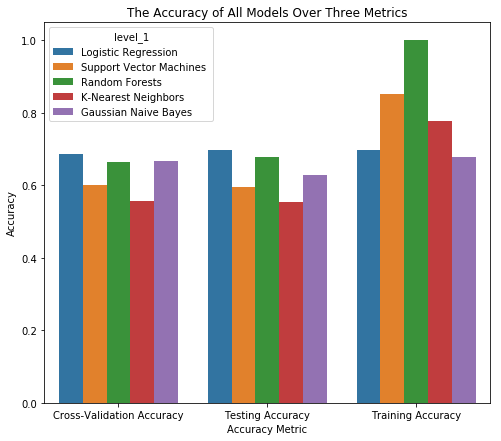

In [109]:
models1 = DataFrame({'Accuracy' : models.unstack()}).reset_index()
# plot accuracies
plt.figure(figsize=(8, 7))
fig_models = sns.barplot(x='level_0', y='Accuracy', hue='level_1', data=models1);
fig_models.set(xlabel='Accuracy Metric', ylabel='Accuracy');
fig_models.set_title('The Accuracy of All Models Over Three Metrics');

# Correlation coefficients

In [110]:
x=zip(X_train.columns, np.transpose(logreg.coef_))
x1=pd.DataFrame(list(x))
x1.head()

,0,1
0,Aircraft: Number of engines?,[0.0992227716755]
1,Feet above ground,[0.00011421440218]
2,Miles from airport,[-0.0308615637581]
3,Speed (IAS) in knots,[-0.0765739733385]
4,Flight Month,[-0.0131481990243]


In [112]:
# get Correlation Coefficient for each feature using Logistic Regression
logreg_df = pd.DataFrame(list(zip(X_train.columns, np.transpose(logreg.coef_))))
logreg_df.columns = ['Features','Coefficient Estimate']
logreg_df['sort'] = logreg_df['Coefficient Estimate'].abs()

# get top 10 most influential coefficient estimates
logreg_df.sort_values(['sort'],ascending=0).drop('sort',axis=1).head(10)

,Features,Coefficient Estimate
7,Large,[1.59848027829]
9,Small,[-1.10844256171]
12,Descent,[1.09837667597]
14,Landing Roll,[-0.572263875291]
17,Taxi,[-0.402082830577]
18,N,[0.306750265233]
13,En Route,[0.269747399594]
11,Climb,[0.157053897412]
16,Take-off run,[-0.121710191828]
8,Medium,[-0.118600457842]
